# Assignment 3: Niveditha Achanta

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [3]:
#Import modules 
import os
import pandas as pd
# Import modules for plots
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Set directory
directory = 'C:\\Users\\Niveditha_2\\Documents\\STA141B\\assignment3\\fruit'
files=[] #Initialize a list 
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"): #pull all the Excel files
        paths = (os.path.join(directory, filename))
        files.append(paths) #Put the filepaths in the list  

In [5]:
df = pd.DataFrame() #Initialize a dataframe 

for i in files:
    if "pineapple" in i: #Because pineapple has 9 columns if you look at its dimensions 
        continue
    path = i.split("\\") #Split the filepath by \\ so we can use its elements in the dataframe later 
   
    data = pd.read_excel(i, skiprows=[0]).dropna() #Ignore the first row for every spreadsheet
    data['Type'] = path[-2] #Adds the second to last element of the filepath, in this case, "fruit"
    data['Food'] = path[-1][:-5] #Adds the last element of the filepath, minus the ".xlsx"
    #print data.axes
    
    newRow = data[data.Form == "Fresh1"] 
    df = df.append(data[data.Form == "Fresh1"])
fruit = df.drop(df.columns[[2,5]], axis=1) #Drop the columns with unnecessary information 
fruit.columns=["Form", "Avg Price per Lb", "Yield", "Lb per Cup", "Avg Price per Cup", "Type", "Food"]    
fruit = fruit.sort_index(axis=1) #Sort by column names to maintain the same order as the veg df below
fruit

,Avg Price per Cup,Avg Price per Lb,Food,Form,Lb per Cup,Type,Yield
1,0.422373,1.56752,apples,Fresh1,0.242508,fruit,0.9
1,1.1891,3.04007,apricots,Fresh1,0.363763,fruit,0.93
1,0.292965,0.566983,bananas,Fresh1,0.330693,fruit,0.64
1,1.59318,4.73462,blueberries,Fresh1,0.31967,fruit,0.95
1,0.3938,0.535874,cantaloupe,Fresh1,0.374786,fruit,0.51
1,1.33455,3.59299,cherries,Fresh1,0.341717,fruit,0.92
1,0.848278,0.897802,grapefruit,Fresh1,0.462971,fruit,0.49
1,0.721266,2.09383,grapes,Fresh1,0.330693,fruit,0.96
1,0.649077,0.796656,honeydew,Fresh1,0.374786,fruit,0.46
1,1.03797,2.04468,kiwi,Fresh1,0.385809,fruit,0.76


__Comments:__ You will notice that the above table includes just fruits tagged with "Fresh1" to provide exact matches. However, fruits such as _blackberries_ and _pineapple_ are excluded. This may be because the dataframe is only taking elements that have 9 columns. Pineapple, for example, has extraneous columns that get excluded in the analysis. Additionally, fruits might be missing because the above code only provides _exact_ matches for "Fresh1", and the reason for this is that in cases like this, it is more important to have an accurate dataset than one that is comprehensive but may contain misinformation. We want to use an exact match here so that it returns consistent data throughout.

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

    Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [7]:
#Set directory
directory = 'C:\\Users\\Niveditha_2\\Documents\\STA141B\\assignment3\\vegetables'
files=[] #Initialize a list 
for filename in os.listdir(directory):
    if filename.endswith(".xlsx"): #pull all the Excel files
        paths = (os.path.join(directory, filename))
        files.append(paths) #Put the filepaths in the list    
df=pd.DataFrame() #Initialize a dataframe 

for i in files:
    path = i.split("\\") #Split the filepath by \\ so we can use its elements in the dataframe later 
    data=pd.read_excel(i, skiprows=[0]).dropna() #Ignore the first row for every spreadsheet
    data['Type'] = path[-2] #Adds the second to last element of the filepath, in this case, "fruit"
    data['Food'] = path[-1][:-5] #Adds the last element of the filepath, minus the ".xlsx"

    df = df.append(data[data.Form == "Fresh1"])
    
veg = df.drop(df.columns[[7, 8,9, 10]], axis=1)
veg.columns = ["Avg Price per Cup", "Avg Price per Lb", "Food", "Form", "Yield", "Lb per Cup",  "Type"]
veg = veg.sort_index(axis=1)
veg

,Avg Price per Cup,Avg Price per Lb,Food,Form,Lb per Cup,Type,Yield
1,1.15536,1.172248,acorn_squash,Fresh1,0.451948,vegetables,0.458554
1,2.27497,2.213050,artichoke,Fresh1,0.385809,vegetables,0.375309
1,2.58227,3.213494,asparagus,Fresh1,0.396832,vegetables,0.493835
1,0.964886,2.235874,avocados,Fresh1,0.31967,vegetables,0.740753
1,0.890898,2.763553,brussels_sprouts,Fresh1,0.341717,vegetables,1.06
1,0.787893,1.244737,butternut_squash,Fresh1,0.451948,vegetables,0.714
1,0.650001,2.630838,collard_greens,Fresh1,0.286601,vegetables,1.16
1,1.8125,2.690623,corn_sweet,Fresh1,0.363763,vegetables,0.54
1,0.696606,2.139972,green_beans,Fresh1,0.275578,vegetables,0.846575
1,0.455022,1.410363,green_peppers,Fresh1,0.264555,vegetables,0.82


__Comments:__ No, it doesn't produce any price for tomatoes. This is because the tomatoes' price is split into various categories: grape and cherry, roma, and beefsteak. The code similarly does not return values for vegetables that have different subcategories-- for example, spinach is split into boiled and raw, so there isn't one consolidated price value for it.

The code itself is designed to return exact matches for "Fresh1", so if something has a subcategory, it will not return it. This avoids errors and problems that may arise from data mismatches. 

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [8]:
df3 = fruit.append(veg) #Append veg to fruit 
df3 = df3.apply(lambda x: pd.to_numeric(x, errors = 'ignore')) #Make sure all columns with numbers are actually numeric
df3

,Avg Price per Cup,Avg Price per Lb,Food,Form,Lb per Cup,Type,Yield
1,0.422373,1.567515,apples,Fresh1,0.242508,fruit,0.900000
1,1.189102,3.040072,apricots,Fresh1,0.363763,fruit,0.930000
1,0.292965,0.566983,bananas,Fresh1,0.330693,fruit,0.640000
1,1.593177,4.734622,blueberries,Fresh1,0.319670,fruit,0.950000
1,0.393800,0.535874,cantaloupe,Fresh1,0.374786,fruit,0.510000
1,1.334548,3.592990,cherries,Fresh1,0.341717,fruit,0.920000
1,0.848278,0.897802,grapefruit,Fresh1,0.462971,fruit,0.490000
1,0.721266,2.093827,grapes,Fresh1,0.330693,fruit,0.960000
1,0.649077,0.796656,honeydew,Fresh1,0.374786,fruit,0.460000
1,1.037970,2.044683,kiwi,Fresh1,0.385809,fruit,0.760000


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

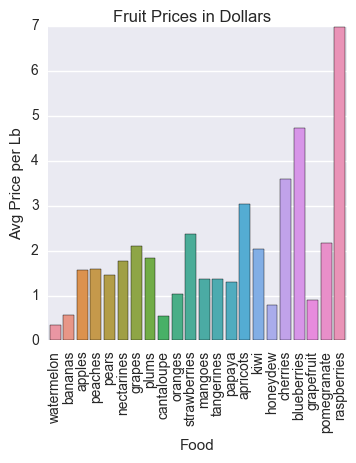

In [21]:
#Most expensive foods per pound: compare "Avg Price per Lb" for fruits 
exp = sns.factorplot("Food", "Avg Price per Lb", data = fruit, kind = "bar") #data=veg to see vegetable bar plot
exp.set_xticklabels(rotation=90) #Rotate axis labels so they don't overlap
exp.fig.suptitle('Fruit Prices in Dollars')
plt.show(exp)

__Comments:__ Raspberries are the most expensive fruit and watermelons are the cheapest per pound.

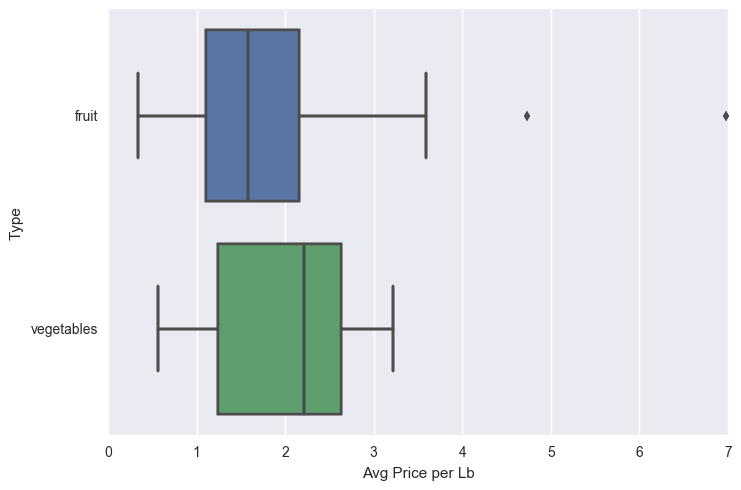

In [16]:
#Distributions
dists=sns.boxplot("Avg Price per Lb", "Type", data = df3)
plt.show(dists)

__Comments:__ Other than the existence of two outliers (raspberries and blueberries, as can be seen from the first plot), the fruit prices are less skewed. They also have a wider range than the vegetables, which have no outliers. The median for the vegetables group is slightly above \$2, and is higher than the median for fruits, which is a little higher than \'1.50. 

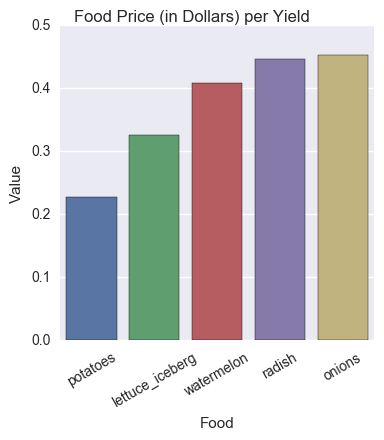

In [22]:
#Best value for price
#Divide lb per cup by avg price per cup to get lb per price 
df3['Value'] = df3['Avg Price per Cup']/df3['Yield']
df3=df3.sort_values(by = "Value", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last') 
#ascending=False for least value for money
vals=df3[:5:] #Only first five rows
valplot=sns.factorplot("Food", "Value", data = vals, kind = "bar") #Barplot
valplot.set_xticklabels(rotation=30) #Rotate axis labels for readability
valplot.fig.suptitle('Food Price (in Dollars) per Yield')
plt.show(valplot)

__Comments:__ The five foods with the overall best value for money, by comparing price per cup to yield, are potatoes, iceberg lettuce, watermelon, radish, and onions. If we want to find out the five fruits and five vegetables with the best value for money, we can do that as well, and this is pictured below. The two graphs below show us that the fruits with the most value for money (in order of most to least valuable) are watermelon, bananas, apples, peaches, and pears. The vegetables results are potatoes, iceberg lettuce, radish, onions, and green peppers. 

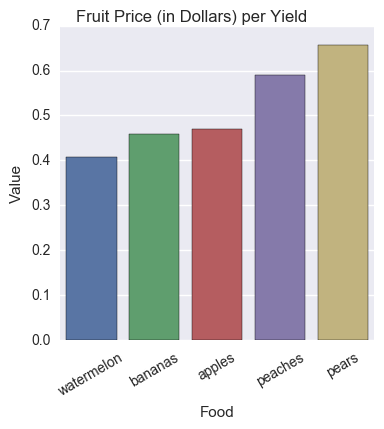

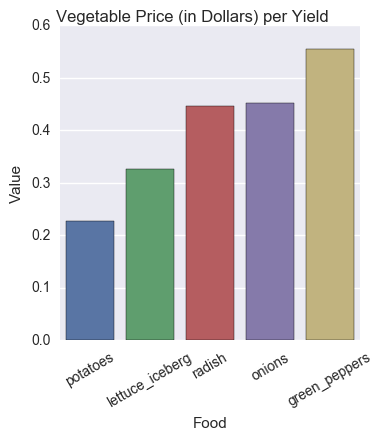

In [19]:
#Top 5 for fruit
fruit['Value'] = fruit['Avg Price per Cup']/fruit['Yield']
fruit = fruit.sort_values(by = "Value", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
vals = fruit[:5:]
valplot = sns.factorplot("Food", "Value", data = vals, kind = "bar")
valplot.set_xticklabels(rotation=30)
valplot.fig.suptitle('Fruit Price (in Dollars) per Yield')
plt.show(valplot)

#Top 5 for veg
veg['Value'] = veg['Avg Price per Cup']/veg['Yield']
veg = veg.sort_values(by = "Value", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
vals = veg[:5:]
valplot=sns.factorplot("Food", "Value", data = vals, kind = "bar")
valplot.set_xticklabels(rotation=30)
valplot.fig.suptitle('Vegetable Price (in Dollars) per Yield')
plt.show(valplot)

__Comments:__ I'm suprised by the fact that fruits similar to watermelon, such as canteloupe and honeydew, have less value for money than apples, peaches, and pears, especially because they're also some of the cheapest fruits in the fruit group (this can be verified visually by looking at the first barplot). Additionally, I would expect strawberries to be as expensive, if not more, than raspberries and blueberries, which is not the case. Even after ranking the fruits to see which one has the least value for money, strawberries does not make that list, which means it is not as *relatively* expensive (i.e. least valuable) as some of the other fruit. Also, when the fruits and vegetables together are ranked from least to greatest value from money (which can be done by changing `ascending=False` in the code above, the list results are artichoke, asparagus, sweet corn, acorn squash, and raspberries. This is interesting because out of the five most *relatively* expensive items, four of them are vegetables and only one of them is a fruit, even though the fruit price distribution shows that there are two outliers with two fruits being extremely expensive per pound, as well as fruit having a higher price range than vegetables.

__Comments:__ Since the spreadsheets have not recorded information on nutrition, based on intuition, I would assume that all the fruit (maybe not watermelon, since it has the highest water content as compared to actual nutrition value), as well as radishes and green peppers, would be the most beneficial in terms of price, yield, and nutrition. I came to that conclusion by looking at the highest value for money for both fruits and vegetables, and then decided that most fruits are heralded to be high in nutrition, and potatoes, iceberg lettuce, and onions would not necessarily provide nutritional value because potatoes are high in starch content, iceberg lettuce (like watermelon) has a high water content and not much else, and I've never really heard of onions providing high nutritional value.

__Notes:__ Some input from Ricky Safran, Chad Pickering, and Hannah Kosinovsky, even though I'm pretty sure it was just moral support this time around. Everything else is courtesy of various Stackoverflow threads. 